In [40]:
def helper_display_img(image, title):
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

## Import Packages

In [18]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import requests

# Image Enhancement

Penyesuaian intensitas dilakukan dengan **menambah atau mengurangi** kecerahan serta kontras pada citra.

In [ ]:
# URL of the image
url = 'https://st.depositphotos.com/1718692/3543/i/450/depositphotos_35431571-stock-photo-mountain-road-near-the-coniferous.jpg'

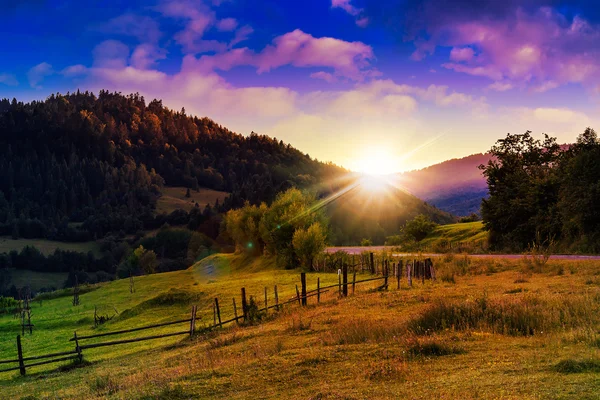

In [27]:
# Get the image from the URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

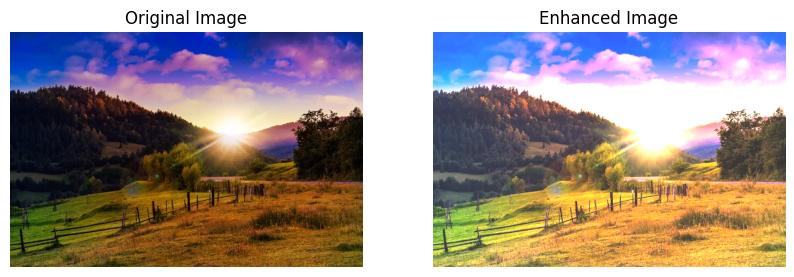

In [54]:
brightness = 50  # Tingkat kecerahan
contrast = 1.5  # Tingkat kontras
img = np.array(img).astype(np.uint8)

# Adjust intensity
enhanced_img = cv2.convertScaleAbs(img, alpha=contrast, beta=brightness)

# Display
plt.figure(figsize=(10, 5))
plt.subplot(121)
helper_display_img(img, 'Original Image')

plt.subplot(122)
helper_display_img(enhanced_img, 'Enhanced Image')

## Reduksi Noise (Noise Reduction)


Pengurangan noise menggunakan Gaussian Blur, yang merupakan salah satu metode efektif untuk menghilangkan noise Gaussian dari citra.

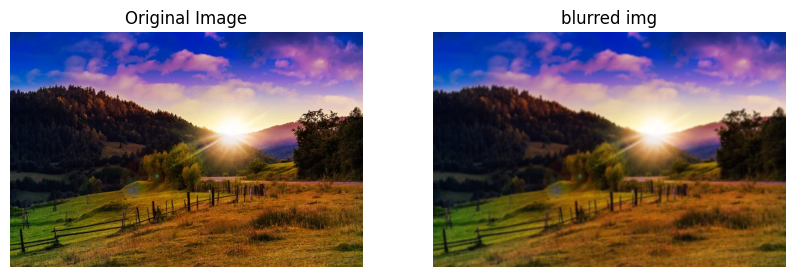

In [44]:
blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

# Display
plt.figure(figsize=(10, 5))
plt.subplot(121)
helper_display_img(img, 'Original Image')

plt.subplot(122)
helper_display_img(blurred_img, 'blurred img')

## Pertajaman Citra (Image Sharpening)

Pertajaman citra dapat dilakukan dengan kernel konvolusi yang menonjolkan perbedaan intensitas antar pixel, meningkatkan ketajaman.

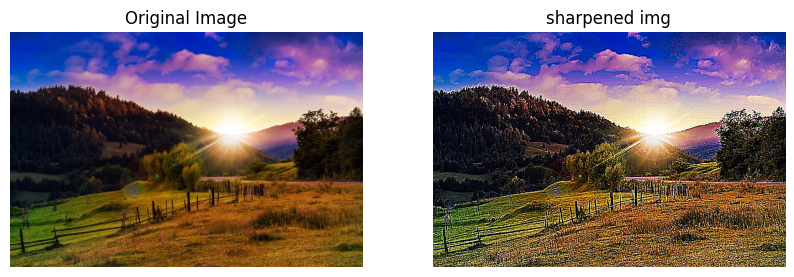

In [45]:
# Kernel for sharpening
sharpening_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpened_img = cv2.filter2D(img, -1, sharpening_kernel)

# Display
plt.figure(figsize=(10, 5))
plt.subplot(121)
helper_display_img(img, 'Original Image')

plt.subplot(122)
helper_display_img(sharpened_img, 'sharpened img')

## Transformasi Geometri


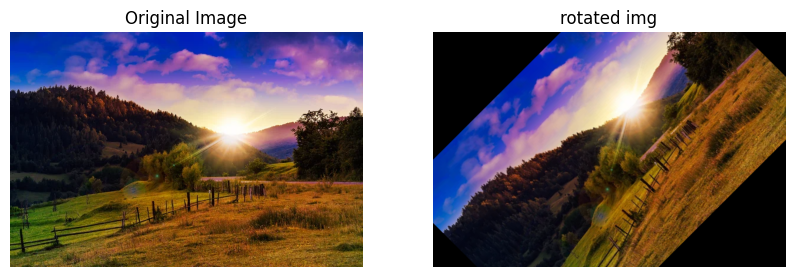

In [46]:
# Rotasi
rows, cols = img.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)  # 45 derajat
rotated_img = cv2.warpAffine(img, rotation_matrix, (cols, rows))

# Display
plt.figure(figsize=(10, 5))
plt.subplot(121)
helper_display_img(img, 'Original Image')

plt.subplot(122)
helper_display_img(rotated_img, 'rotated img')

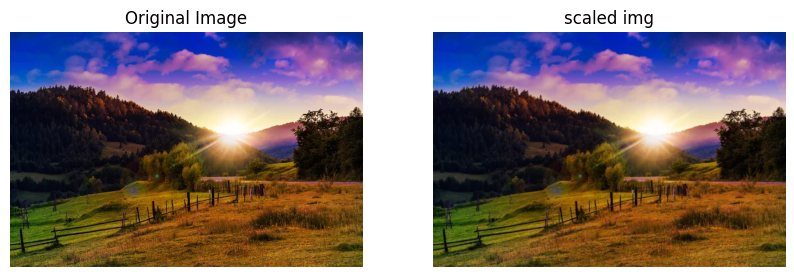

In [47]:
# Skala
scaled_img = cv2.resize(img, None, fx=1.5, fy=1.5)  # Skala 1.5x

# Display
plt.figure(figsize=(10, 5))
plt.subplot(121)
helper_display_img(img, 'Original Image')

plt.subplot(122)
helper_display_img(scaled_img, 'scaled img')

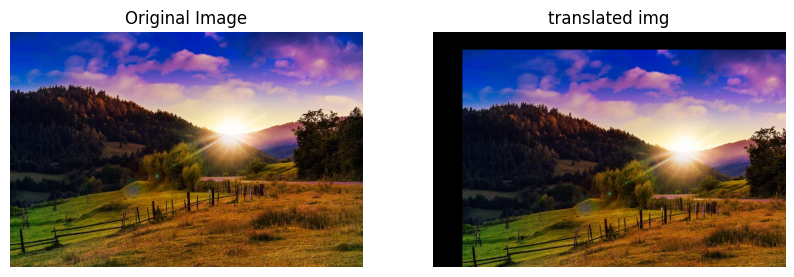

In [48]:
# Translasi
translation_matrix = np.float32([[1, 0, 50], [0, 1, 30]])  # Geser 50 piksel kanan, 30 piksel bawah
translated_img = cv2.warpAffine(img, translation_matrix, (cols, rows))

# Display
plt.figure(figsize=(10, 5))
plt.subplot(121)
helper_display_img(img, 'Original Image')

plt.subplot(122)
helper_display_img(translated_img, 'translated img')

## Transformasi Morfologi

Transformasi morfologi bermanfaat untuk operasi biner, seperti erosi dan dilasi

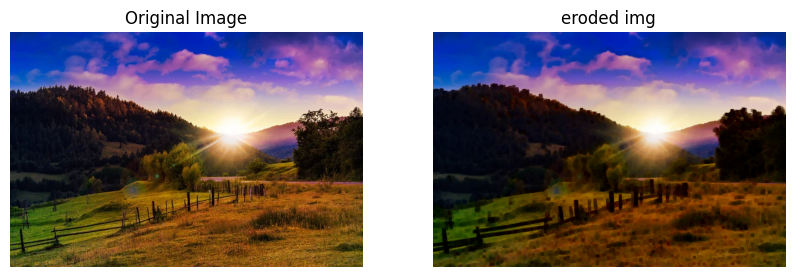

In [49]:
# Erosion
kernel = np.ones((5, 5), np.uint8)
eroded_img = cv2.erode(img, kernel, iterations=1)

# Display
plt.figure(figsize=(10, 5))
plt.subplot(121)
helper_display_img(img, 'Original Image')

plt.subplot(122)
helper_display_img(eroded_img, 'eroded img')

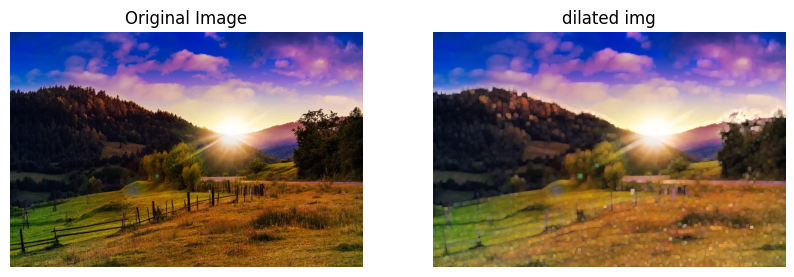

In [50]:
# Dilatation
dilated_img = cv2.dilate(img, kernel, iterations=1)

# Display
plt.figure(figsize=(10, 5))
plt.subplot(121)
helper_display_img(img, 'Original Image')

plt.subplot(122)
helper_display_img(dilated_img, 'dilated img')

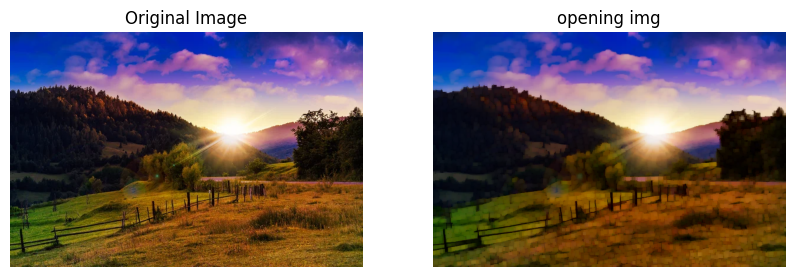

In [52]:
# Opening
opening_img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Display
plt.figure(figsize=(10, 5))
plt.subplot(121)
helper_display_img(img, 'Original Image')

plt.subplot(122)
helper_display_img(opening_img, 'opening img')

## Edge Detection

Metode ini digunakan untuk mendeteksi tepi pada citra.

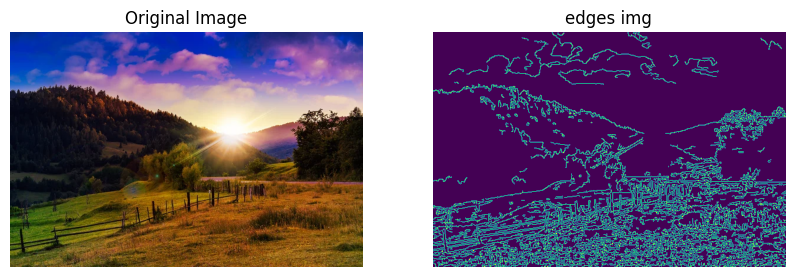

In [53]:
edges = cv2.Canny(img, 100, 200)

# Display
plt.figure(figsize=(10, 5))
plt.subplot(121)
helper_display_img(img, 'Original Image')

plt.subplot(122)
helper_display_img(edges, 'edges img')